# Manipulating Images with NumPy

Importing necessary libraries

In [2]:
import numpy as np
from PIL import Image

Assigning the image to a variable

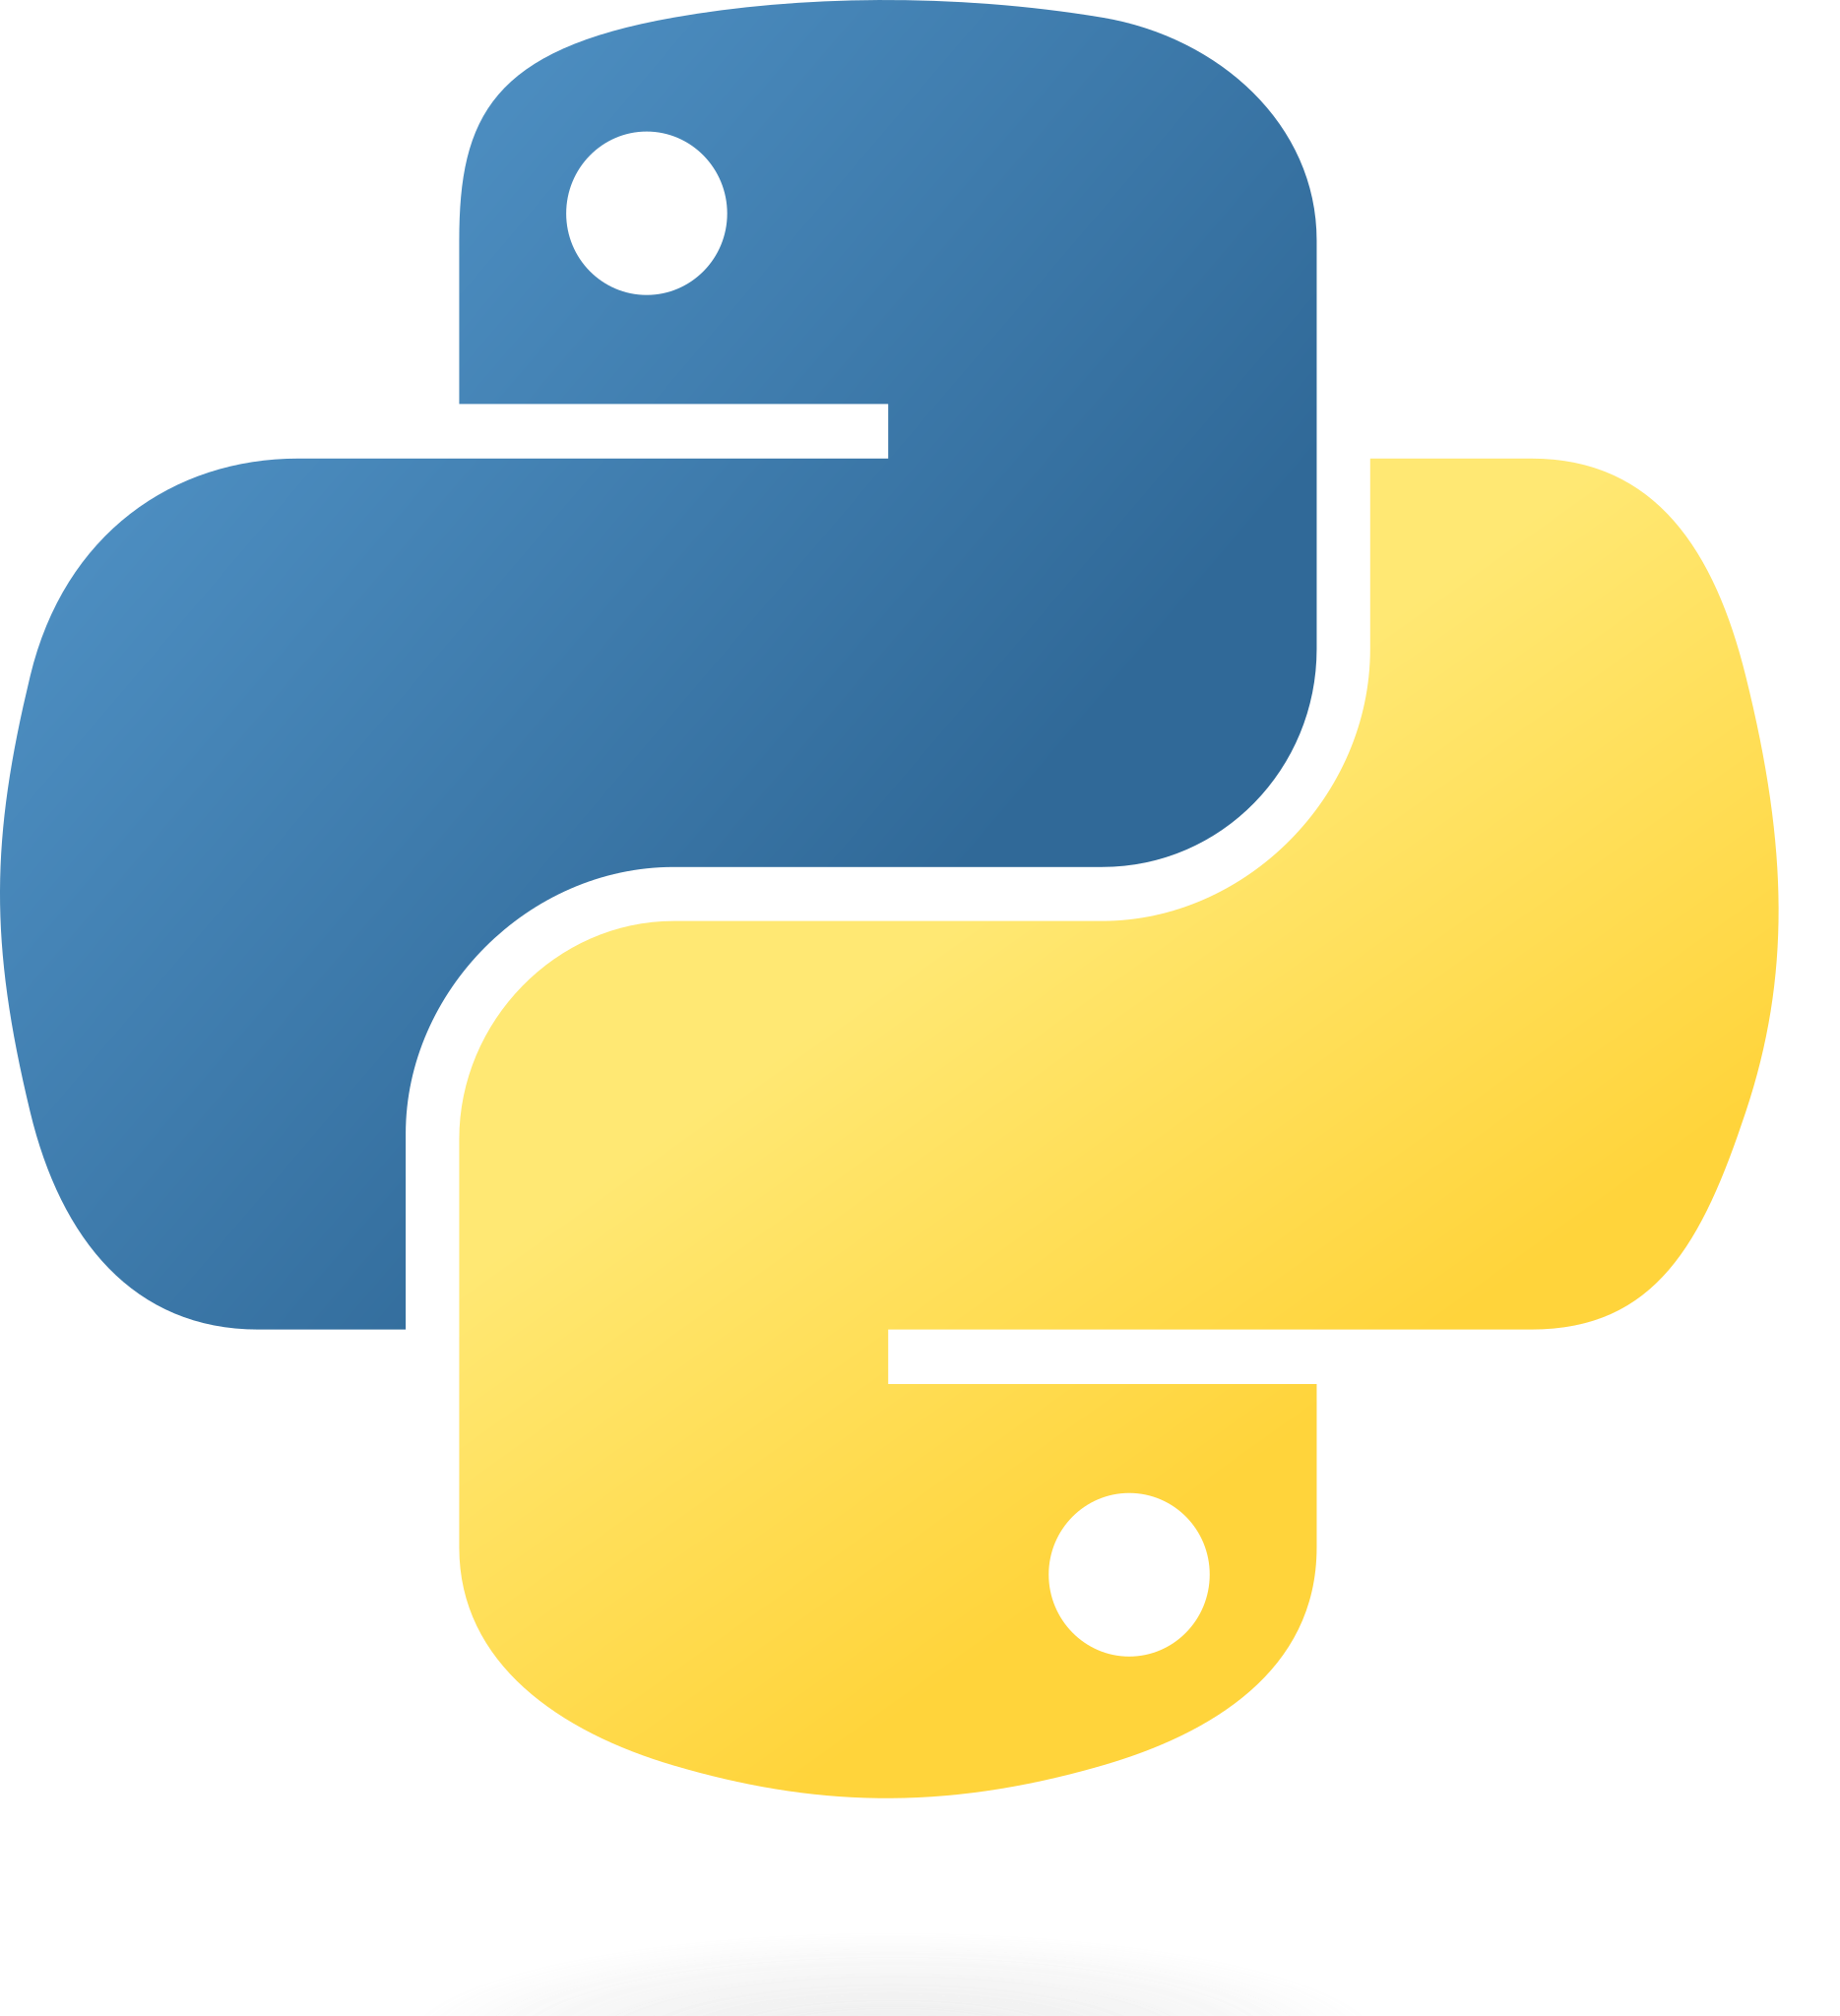

In [3]:
image = Image.open(r'/Users/aram/Desktop/AUA/Programming For Data Science/Homework 4/python-logo.png')
image

 Converting the image into a NumPy array 

In [4]:
inv = image.copy()
inv_array = np.array(inv)
inv_array

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

# Inverting Colors Without Affecting Transparency

As we get 3D array, the first 3 numbers in our innermost array are RGB respectively. We need to do a scalar subtraction to invert the colors of the picture and re convert it to image. 

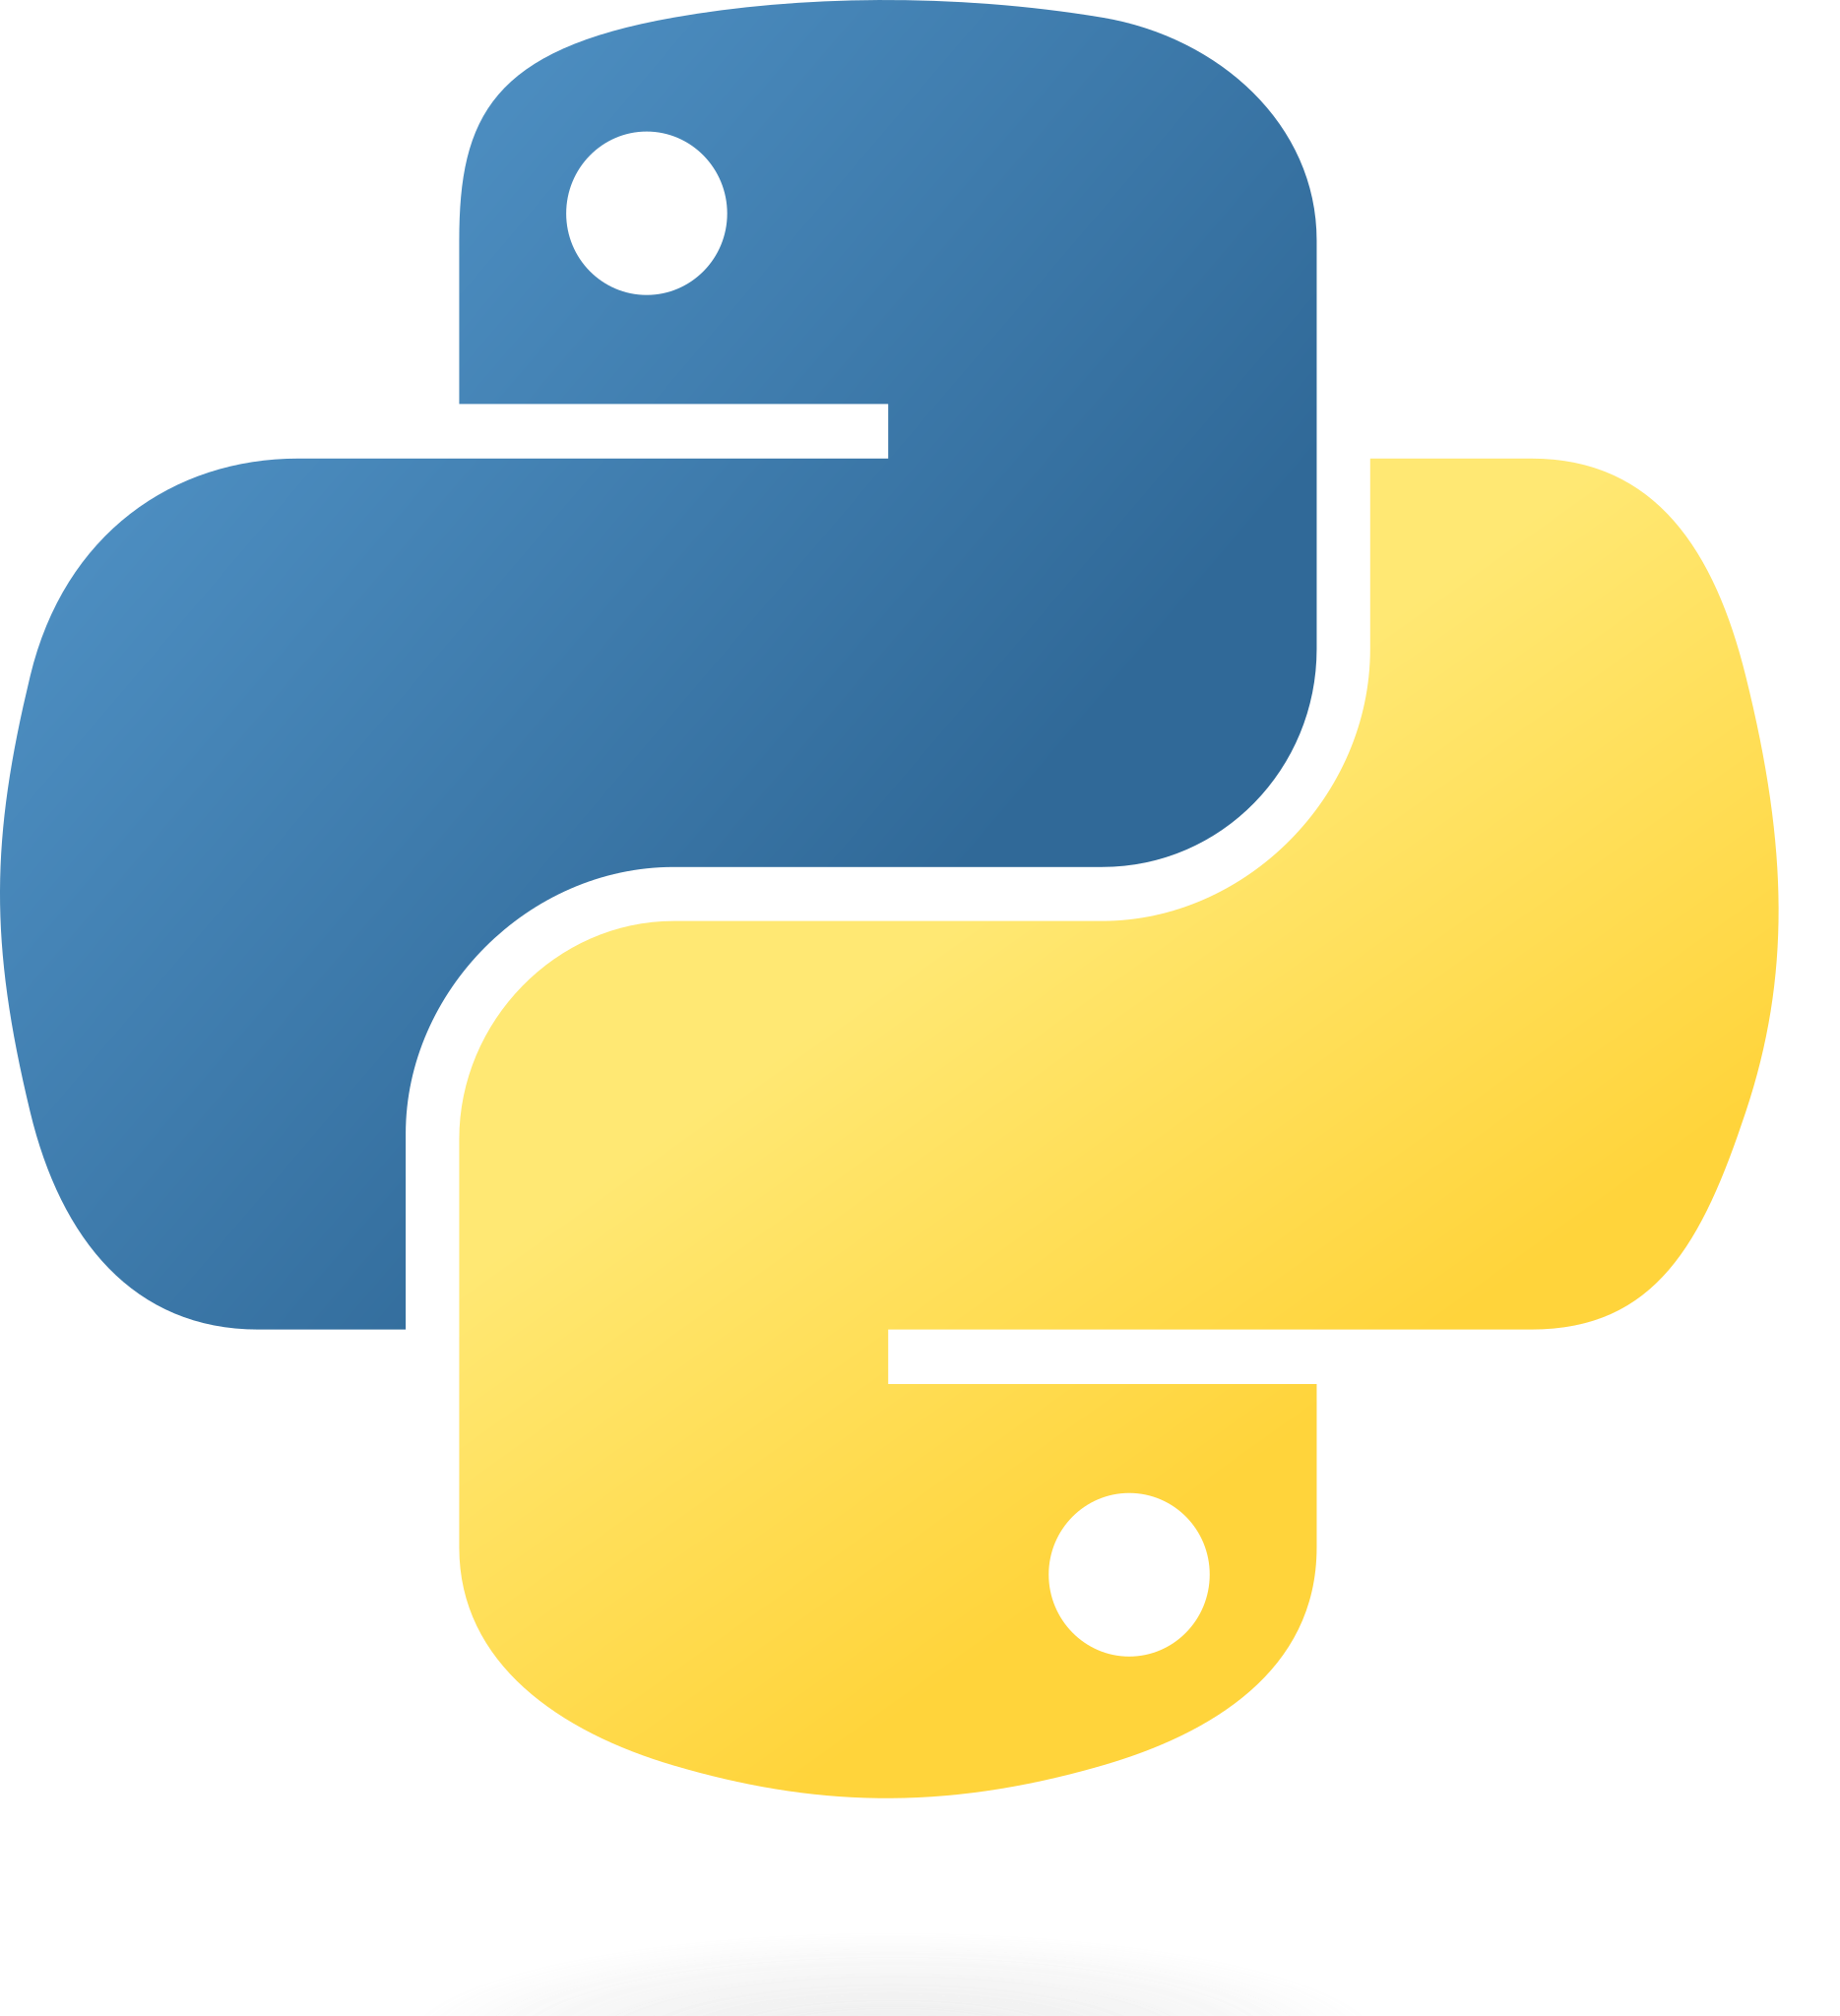

In [9]:
inv_array[:, :, :3] = 255 - inv_array[:, :, :3]
inverted  = Image.fromarray(inv_array)
inverted

# Converting to Grayscale with Transparency

Similarly to previous part, here we also have the same format of array. Here we need to calculate the mean of the first 3 numbers in our innermost arrays and instead of RGB 3 numbers have just one number to get grayscale image. So we need to calculate the means $(result)$, round them by the right type $result.round().astype(np.unit8)$, reshape them to right sizes and formats $(a, b)$ and concatenate by the right axis (in this case the 3rd axis) and finally we convert it back to an image

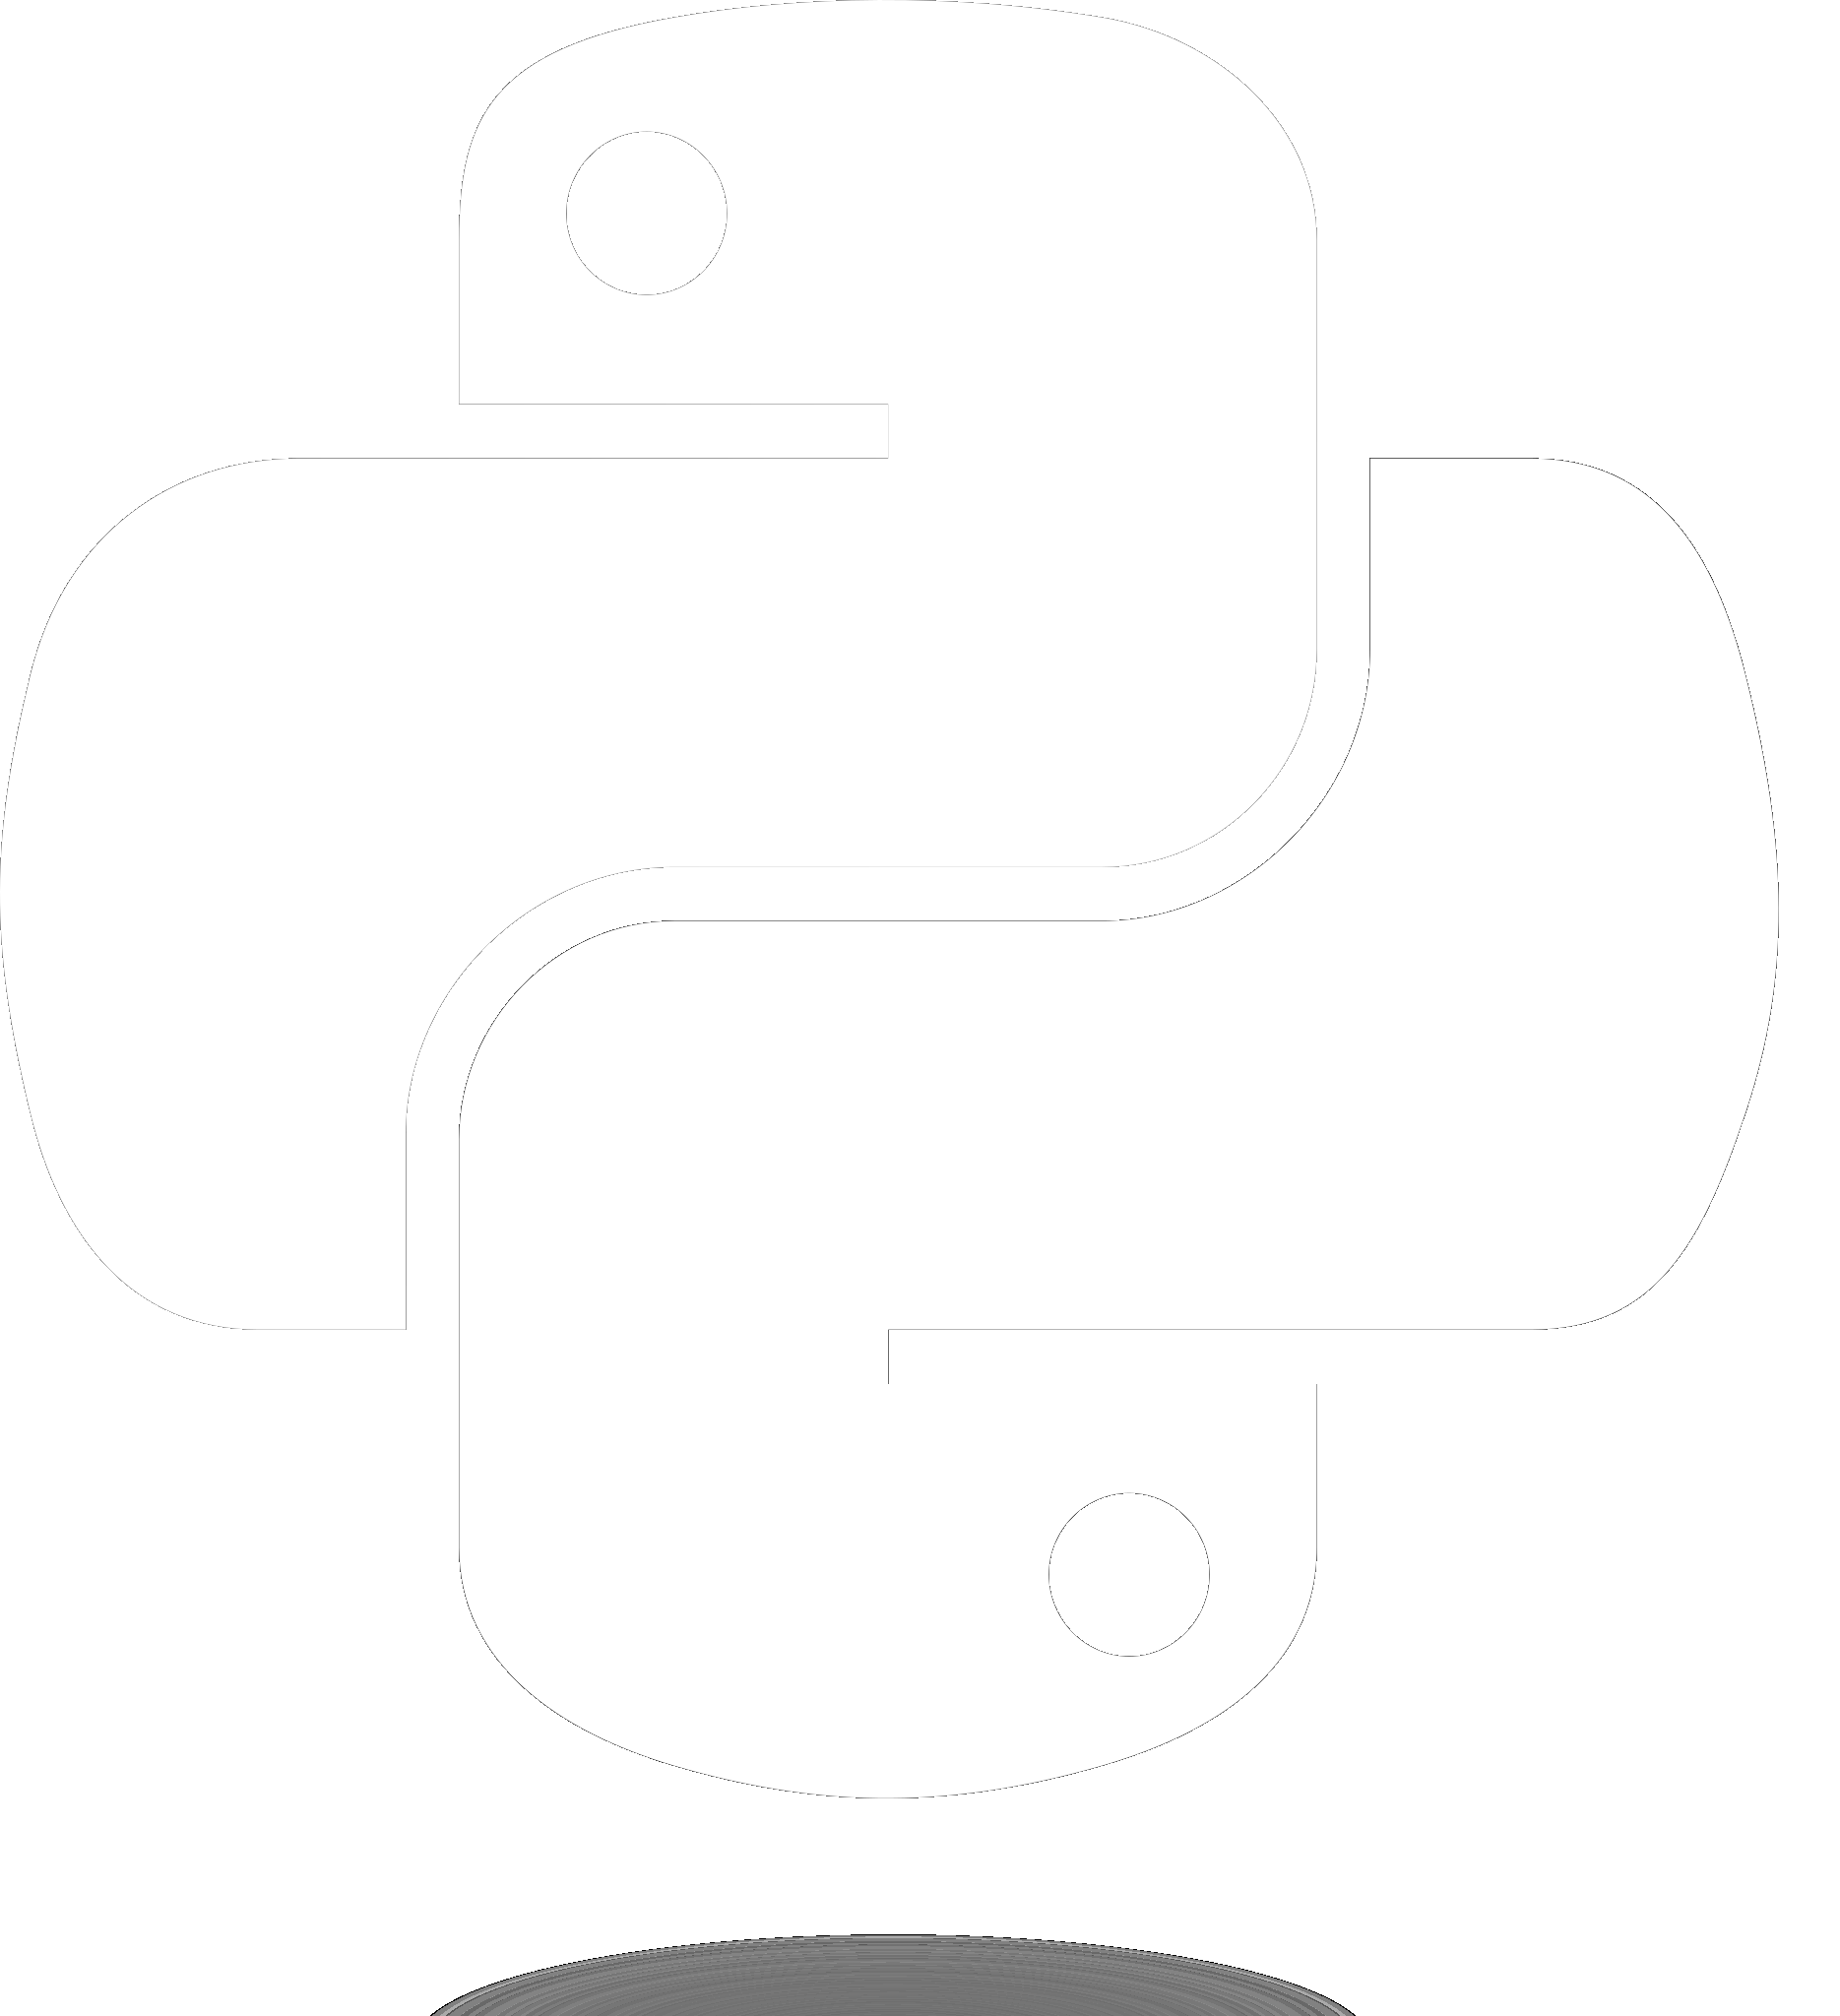

In [6]:
grscl = image.copy()
grscl_array = np.array(grscl)
result = np.sum(grscl_array[:,:,:3], axis=2) / 3
result = result.round().astype(np.uint8)
a = grscl_array[:, :, 3].reshape(2048, -1, 1)
b = result.reshape(2048, -1, 1)
grscl = np.concatenate((a,b), axis = 2)
grscl = Image.fromarray(grscl)
grscl

# Rotating the Image 90 Degrees Clockwise

First we flip the array along the first axis, which results in a vertical flip of the image.$(np.flip(rotate\_array, 0))$

Then we transpose the array, rotating the image counterclockwise by 90 degrees. By specifying the order of axes as $[1, 0, 2]$, it swaps the width and height axes. The first axis becomes the second, and the second axis becomes the first.$(np.transpose(..., [1, 0, 2]))$

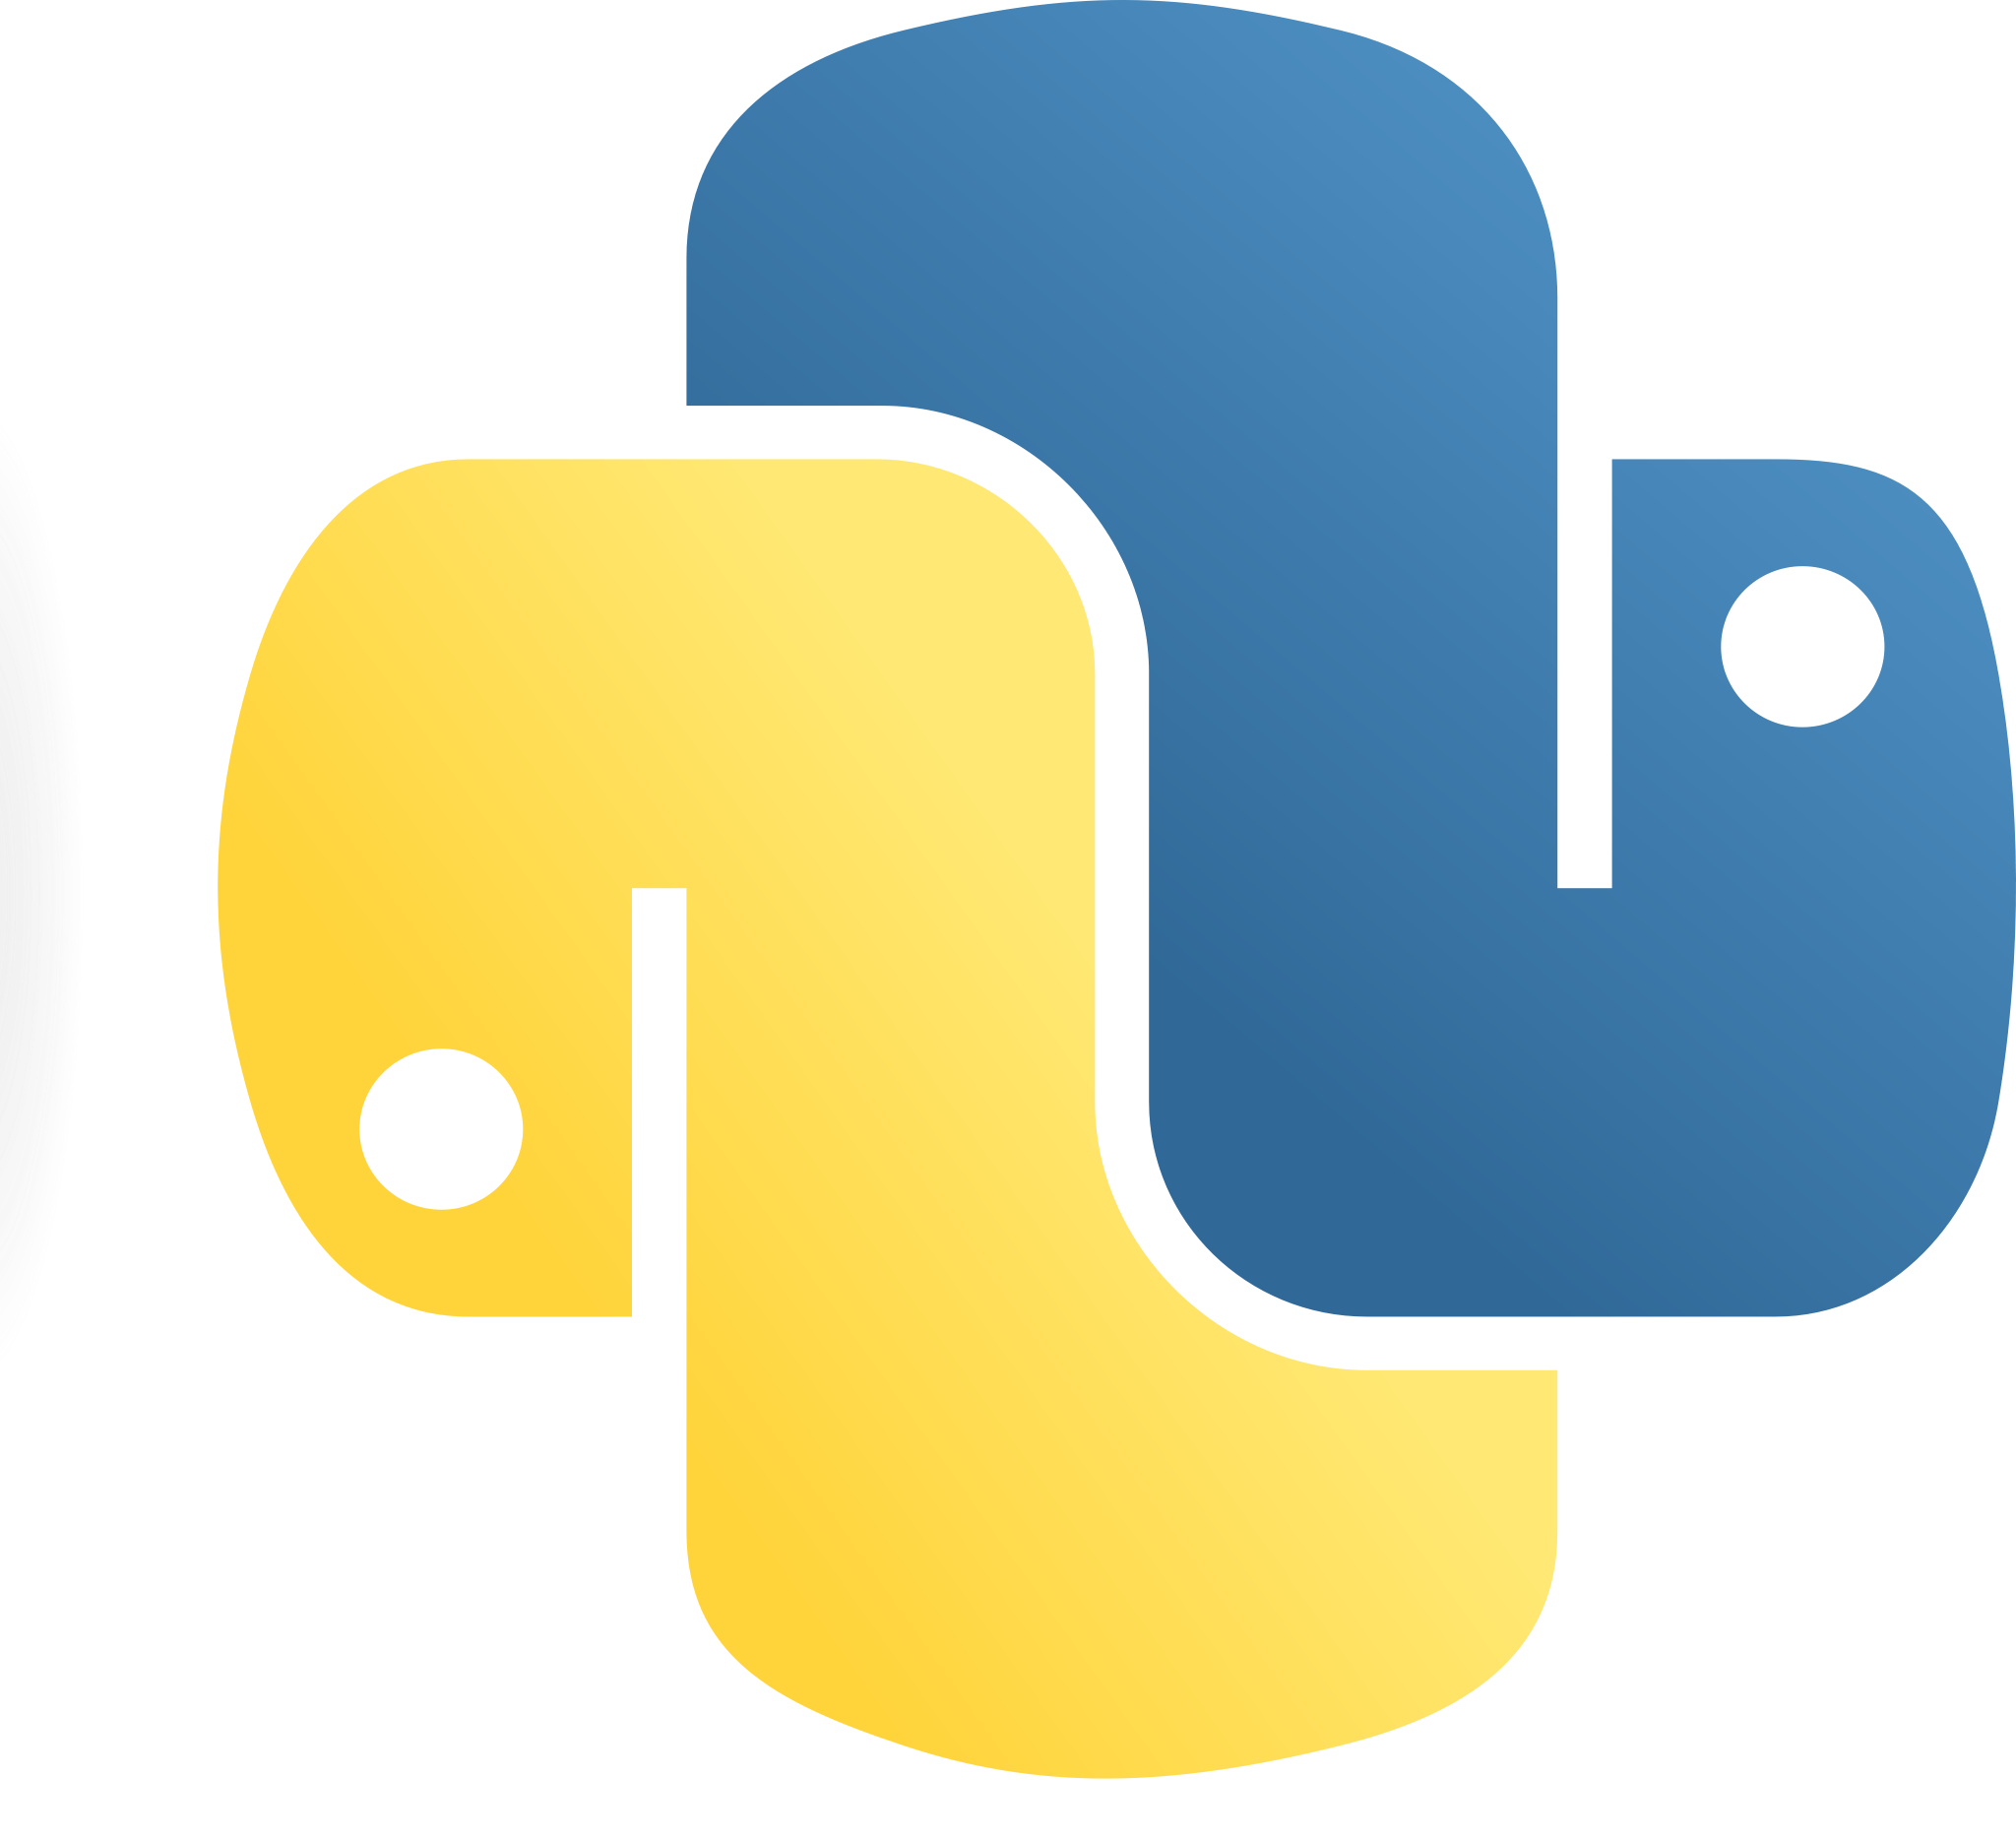

In [7]:
rotate = image.copy()
rotate_array = np.array(rotate)
rotate_array = np.transpose(np.flip(rotate_array, 0), [1, 0, 2])
rotate = Image.fromarray(rotate_array)
rotate

# Creating a Mirrored (Horizontally Flipped) Version

To get the mirrored version of an image we simply flip the NumPy array by the second axis (axis 1).
For that we use $np.flip(...,1)$

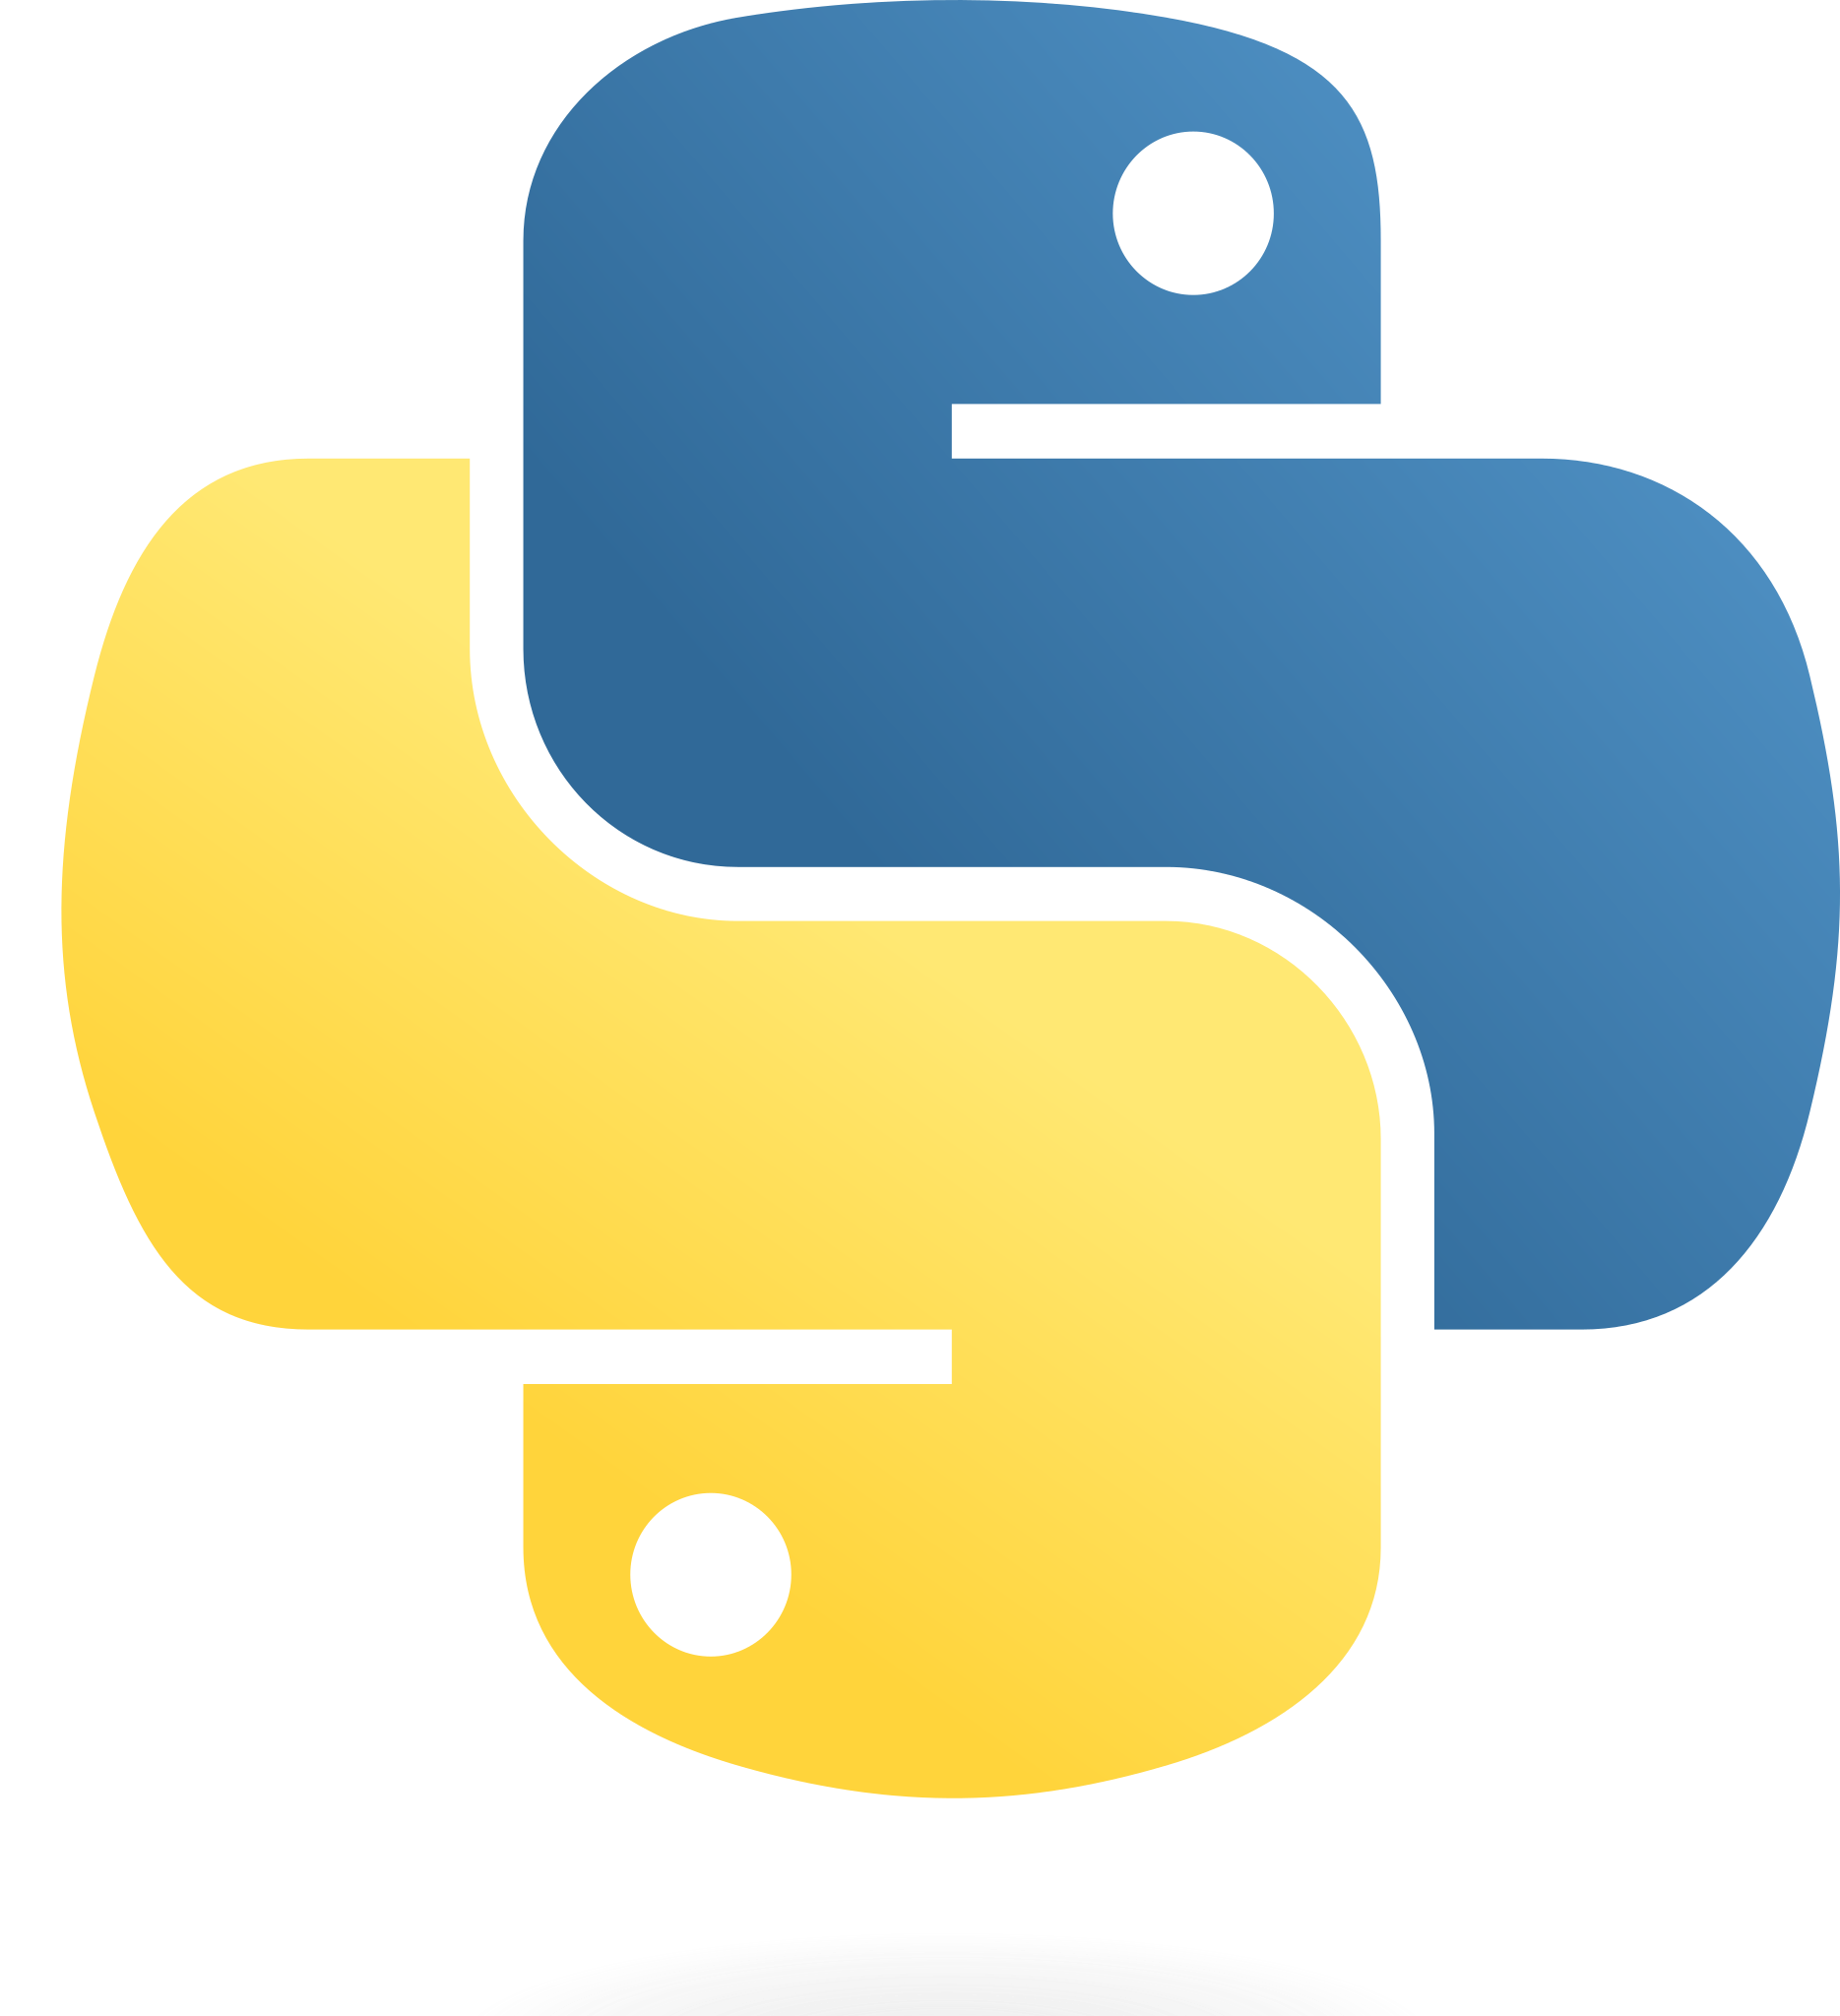

In [8]:
mirrored = image.copy()
mirrored_array = np.array(mirrored)
mirrored_array = np.flip(mirrored_array, 1)
mirrored = Image.fromarray(mirrored_array)
mirrored